In [1]:
!pip3 install snscrape 

In [40]:
import pandas as pd 

import numpy as np 

import snscrape.modules.twitter as sntwitter 

import seaborn as sns 

import matplotlib.pyplot as plt 

In [3]:
# Creating list to append tweet data to
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('netflix since:2023-01-01 until:2023-02-01').get_items()):
    if i>10000: #number of tweets you want to scrape
        break
    attributes_container.append([tweet.user.username, tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.rawContent])
    
# Creating a dataframe to load the list
tweets_netflix = pd.DataFrame(attributes_container, columns=["User", "Date Created", "Number of Likes", "Source of Tweet", "Tweet"])

In [4]:
print(tweets_netflix.shape)

(10001, 5)


In [5]:
tweets_netflix.head()

,User,Date Created,Number of Likes,Source of Tweet,Tweet
0,Mappy_HTRM,2023-01-31 23:59:59+00:00,1,Twitter for iPhone,NETFLIX REVERSE YOUR DECISION\n#SaveWarriorNun...
1,lyricstitches,2023-01-31 23:59:58+00:00,0,Twitter for iPhone,@alitheloaf Muting Netflix when u load it up s...
2,evangfs,2023-01-31 23:59:58+00:00,0,Twitter for iPhone,Agora que eu troquei de tv eu perdi todas as s...
3,julesr502,2023-01-31 23:59:54+00:00,0,Twitter for iPhone,@OfficialJLD @netflix You are one of my faves ...
4,goxfishxgo,2023-01-31 23:59:54+00:00,1,Twitter for iPhone,"@QuinnNoelle94 A year traveling for free, assu..."


In [6]:
tweets_netflix.to_csv('Tweets_netflix.csv',index=False)

In [41]:
# Reading Data
tweets_netflix = pd.read_csv('Tweets_netflix.csv')
print(tweets_netflix.shape)

(10001, 6)


In [42]:
import nltk
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

True

In [43]:
# Checking for NA Values
tweets_netflix.isnull().sum()

Unnamed: 0         0
User               0
Date Created       0
Number of Likes    0
Source of Tweet    0
Tweet              0
dtype: int64

In [44]:
tweets_netflix["Tweet"] = tweets_netflix["Tweet"].astype(str)

In [45]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
#defining the function to remove punctuation
def remove_punctuation(Tweet):
    punctuationfree="".join([i for i in Tweet if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free Tweet
tweets_netflix['preprocess_Tweet']= tweets_netflix['Tweet'].apply(lambda x:remove_punctuation(x))
tweets_netflix.head()

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,preprocess_Tweet
0,0,Mappy_HTRM,2023-01-31 23:59:59+00:00,1,Twitter for iPhone,NETFLIX REVERSE YOUR DECISION\n#SaveWarriorNun...,NETFLIX REVERSE YOUR DECISION\nSaveWarriorNun ...
1,1,lyricstitches,2023-01-31 23:59:58+00:00,0,Twitter for iPhone,@alitheloaf Muting Netflix when u load it up s...,alitheloaf Muting Netflix when u load it up so...
2,2,evangfs,2023-01-31 23:59:58+00:00,0,Twitter for iPhone,Agora que eu troquei de tv eu perdi todas as s...,Agora que eu troquei de tv eu perdi todas as s...
3,3,julesr502,2023-01-31 23:59:54+00:00,0,Twitter for iPhone,@OfficialJLD @netflix You are one of my faves ...,OfficialJLD netflix You are one of my faves as...
4,4,goxfishxgo,2023-01-31 23:59:54+00:00,1,Twitter for iPhone,"@QuinnNoelle94 A year traveling for free, assu...",QuinnNoelle94 A year traveling for free assumi...


In [47]:
tweets_netflix['preprocess_Tweet']= tweets_netflix['preprocess_Tweet'].apply(lambda x: x.lower())
tweets_netflix.head()

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,preprocess_Tweet
0,0,Mappy_HTRM,2023-01-31 23:59:59+00:00,1,Twitter for iPhone,NETFLIX REVERSE YOUR DECISION\n#SaveWarriorNun...,netflix reverse your decision\nsavewarriornun ...
1,1,lyricstitches,2023-01-31 23:59:58+00:00,0,Twitter for iPhone,@alitheloaf Muting Netflix when u load it up s...,alitheloaf muting netflix when u load it up so...
2,2,evangfs,2023-01-31 23:59:58+00:00,0,Twitter for iPhone,Agora que eu troquei de tv eu perdi todas as s...,agora que eu troquei de tv eu perdi todas as s...
3,3,julesr502,2023-01-31 23:59:54+00:00,0,Twitter for iPhone,@OfficialJLD @netflix You are one of my faves ...,officialjld netflix you are one of my faves as...
4,4,goxfishxgo,2023-01-31 23:59:54+00:00,1,Twitter for iPhone,"@QuinnNoelle94 A year traveling for free, assu...",quinnnoelle94 a year traveling for free assumi...


In [48]:
#defining function for tokenization
import re
def tokenization(Tweet):
    tokens = re.split('W+',Tweet)
    return tokens
#applying function to the column
tweets_netflix['preprocess_Tweet']= tweets_netflix['preprocess_Tweet'].apply(lambda x: tokenization(x))
tweets_netflix.head()

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,preprocess_Tweet
0,0,Mappy_HTRM,2023-01-31 23:59:59+00:00,1,Twitter for iPhone,NETFLIX REVERSE YOUR DECISION\n#SaveWarriorNun...,[netflix reverse your decision\nsavewarriornun...
1,1,lyricstitches,2023-01-31 23:59:58+00:00,0,Twitter for iPhone,@alitheloaf Muting Netflix when u load it up s...,[alitheloaf muting netflix when u load it up s...
2,2,evangfs,2023-01-31 23:59:58+00:00,0,Twitter for iPhone,Agora que eu troquei de tv eu perdi todas as s...,[agora que eu troquei de tv eu perdi todas as ...
3,3,julesr502,2023-01-31 23:59:54+00:00,0,Twitter for iPhone,@OfficialJLD @netflix You are one of my faves ...,[officialjld netflix you are one of my faves a...
4,4,goxfishxgo,2023-01-31 23:59:54+00:00,1,Twitter for iPhone,"@QuinnNoelle94 A year traveling for free, assu...",[quinnnoelle94 a year traveling for free assum...


In [49]:
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [50]:
#defining the function to remove stopwords from tokenized Tweet
def remove_stopwords(Tweet):
    output= [i for i in Tweet if i not in stopwords]
    return output
#applying the function
tweets_netflix['preprocess_Tweet']= tweets_netflix['preprocess_Tweet'].apply(lambda x:remove_stopwords(x))
tweets_netflix.head()

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,preprocess_Tweet
0,0,Mappy_HTRM,2023-01-31 23:59:59+00:00,1,Twitter for iPhone,NETFLIX REVERSE YOUR DECISION\n#SaveWarriorNun...,[netflix reverse your decision\nsavewarriornun...
1,1,lyricstitches,2023-01-31 23:59:58+00:00,0,Twitter for iPhone,@alitheloaf Muting Netflix when u load it up s...,[alitheloaf muting netflix when u load it up s...
2,2,evangfs,2023-01-31 23:59:58+00:00,0,Twitter for iPhone,Agora que eu troquei de tv eu perdi todas as s...,[agora que eu troquei de tv eu perdi todas as ...
3,3,julesr502,2023-01-31 23:59:54+00:00,0,Twitter for iPhone,@OfficialJLD @netflix You are one of my faves ...,[officialjld netflix you are one of my faves a...
4,4,goxfishxgo,2023-01-31 23:59:54+00:00,1,Twitter for iPhone,"@QuinnNoelle94 A year traveling for free, assu...",[quinnnoelle94 a year traveling for free assum...


In [51]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()
#defining a function for stemming
def stemming(Tweet):
    stem_Tweet = [porter_stemmer.stem(word) for word in Tweet]
    return stem_Tweet
tweets_netflix['preprocess_Tweet']=tweets_netflix['preprocess_Tweet'].apply(lambda x: stemming(x))
tweets_netflix.head()

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,preprocess_Tweet
0,0,Mappy_HTRM,2023-01-31 23:59:59+00:00,1,Twitter for iPhone,NETFLIX REVERSE YOUR DECISION\n#SaveWarriorNun...,[netflix reverse your decision\nsavewarriornun...
1,1,lyricstitches,2023-01-31 23:59:58+00:00,0,Twitter for iPhone,@alitheloaf Muting Netflix when u load it up s...,[alitheloaf muting netflix when u load it up s...
2,2,evangfs,2023-01-31 23:59:58+00:00,0,Twitter for iPhone,Agora que eu troquei de tv eu perdi todas as s...,[agora que eu troquei de tv eu perdi todas as ...
3,3,julesr502,2023-01-31 23:59:54+00:00,0,Twitter for iPhone,@OfficialJLD @netflix You are one of my faves ...,[officialjld netflix you are one of my faves a...
4,4,goxfishxgo,2023-01-31 23:59:54+00:00,1,Twitter for iPhone,"@QuinnNoelle94 A year traveling for free, assu...",[quinnnoelle94 a year traveling for free assum...


In [52]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(Tweet):
    lemm_Tweet = [wordnet_lemmatizer.lemmatize(word) for word in Tweet]
    return lemm_Tweet
tweets_netflix['preprocess_Tweet']=tweets_netflix['preprocess_Tweet'].apply(lambda x:lemmatizer(x))
tweets_netflix.head()

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,preprocess_Tweet
0,0,Mappy_HTRM,2023-01-31 23:59:59+00:00,1,Twitter for iPhone,NETFLIX REVERSE YOUR DECISION\n#SaveWarriorNun...,[netflix reverse your decision\nsavewarriornun...
1,1,lyricstitches,2023-01-31 23:59:58+00:00,0,Twitter for iPhone,@alitheloaf Muting Netflix when u load it up s...,[alitheloaf muting netflix when u load it up s...
2,2,evangfs,2023-01-31 23:59:58+00:00,0,Twitter for iPhone,Agora que eu troquei de tv eu perdi todas as s...,[agora que eu troquei de tv eu perdi todas as ...
3,3,julesr502,2023-01-31 23:59:54+00:00,0,Twitter for iPhone,@OfficialJLD @netflix You are one of my faves ...,[officialjld netflix you are one of my faves a...
4,4,goxfishxgo,2023-01-31 23:59:54+00:00,1,Twitter for iPhone,"@QuinnNoelle94 A year traveling for free, assu...",[quinnnoelle94 a year traveling for free assum...


In [53]:
def get_sentence(words):
    #print(words)
    sentence = ' '.join(words)
    #print(sentence)
    return sentence

tweets_netflix['preprocess_Tweet']=tweets_netflix['preprocess_Tweet'].apply(lambda x: get_sentence(x))
tweets_netflix.head()

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,preprocess_Tweet
0,0,Mappy_HTRM,2023-01-31 23:59:59+00:00,1,Twitter for iPhone,NETFLIX REVERSE YOUR DECISION\n#SaveWarriorNun...,netflix reverse your decision\nsavewarriornun ...
1,1,lyricstitches,2023-01-31 23:59:58+00:00,0,Twitter for iPhone,@alitheloaf Muting Netflix when u load it up s...,alitheloaf muting netflix when u load it up so...
2,2,evangfs,2023-01-31 23:59:58+00:00,0,Twitter for iPhone,Agora que eu troquei de tv eu perdi todas as s...,agora que eu troquei de tv eu perdi todas as s...
3,3,julesr502,2023-01-31 23:59:54+00:00,0,Twitter for iPhone,@OfficialJLD @netflix You are one of my faves ...,officialjld netflix you are one of my faves as...
4,4,goxfishxgo,2023-01-31 23:59:54+00:00,1,Twitter for iPhone,"@QuinnNoelle94 A year traveling for free, assu...",quinnnoelle94 a year traveling for free assumi...


In [54]:
!pip install demoji

In [55]:
import demoji
demoji.download_codes()
def remove_emoji(text):
    dem = demoji.findall(text)
    for item in dem.keys():
        text = text.replace(item, '')
    return text

C:\Users\HP\AppData\Local\Temp\ipykernel_1152\2089779934.py:2: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [56]:
#applying function to the column
tweets_netflix['preprocess_Tweet']= tweets_netflix['preprocess_Tweet'].apply(lambda x: remove_emoji(x))
tweets_netflix.head()

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,preprocess_Tweet
0,0,Mappy_HTRM,2023-01-31 23:59:59+00:00,1,Twitter for iPhone,NETFLIX REVERSE YOUR DECISION\n#SaveWarriorNun...,netflix reverse your decision\nsavewarriornun ...
1,1,lyricstitches,2023-01-31 23:59:58+00:00,0,Twitter for iPhone,@alitheloaf Muting Netflix when u load it up s...,alitheloaf muting netflix when u load it up so...
2,2,evangfs,2023-01-31 23:59:58+00:00,0,Twitter for iPhone,Agora que eu troquei de tv eu perdi todas as s...,agora que eu troquei de tv eu perdi todas as s...
3,3,julesr502,2023-01-31 23:59:54+00:00,0,Twitter for iPhone,@OfficialJLD @netflix You are one of my faves ...,officialjld netflix you are one of my faves as...
4,4,goxfishxgo,2023-01-31 23:59:54+00:00,1,Twitter for iPhone,"@QuinnNoelle94 A year traveling for free, assu...",quinnnoelle94 a year traveling for free assumi...


In [57]:
!pip install Tweetblob

ERROR: Could not find a version that satisfies the requirement Tweetblob (from versions: none)
ERROR: No matching distribution found for Tweetblob


In [58]:
!pip install wordcloud

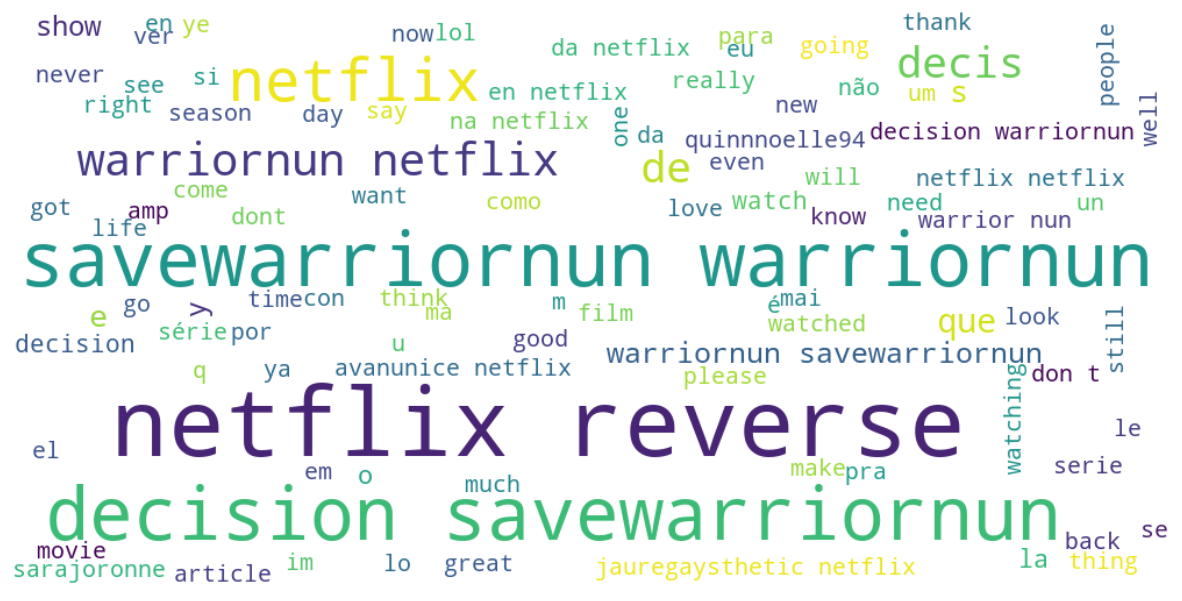

In [59]:
from wordcloud import WordCloud, STOPWORDS
text=" ".join(i for i in tweets_netflix.preprocess_Tweet)
stopwords=set(STOPWORDS)
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords, max_words=100,
                min_font_size = 10).generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [60]:
tweets_netflix.head()

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,preprocess_Tweet
0,0,Mappy_HTRM,2023-01-31 23:59:59+00:00,1,Twitter for iPhone,NETFLIX REVERSE YOUR DECISION\n#SaveWarriorNun...,netflix reverse your decision\nsavewarriornun ...
1,1,lyricstitches,2023-01-31 23:59:58+00:00,0,Twitter for iPhone,@alitheloaf Muting Netflix when u load it up s...,alitheloaf muting netflix when u load it up so...
2,2,evangfs,2023-01-31 23:59:58+00:00,0,Twitter for iPhone,Agora que eu troquei de tv eu perdi todas as s...,agora que eu troquei de tv eu perdi todas as s...
3,3,julesr502,2023-01-31 23:59:54+00:00,0,Twitter for iPhone,@OfficialJLD @netflix You are one of my faves ...,officialjld netflix you are one of my faves as...
4,4,goxfishxgo,2023-01-31 23:59:54+00:00,1,Twitter for iPhone,"@QuinnNoelle94 A year traveling for free, assu...",quinnnoelle94 a year traveling for free assumi...


In [61]:
from textblob import TextBlob

In [62]:
#Create a function to get the polarity
def getPolarity(Tweet):
    return TextBlob(Tweet).sentiment.polarity

In [63]:
tweets_netflix['polarity']=tweets_netflix['preprocess_Tweet'].apply(getPolarity)
tweets_netflix.sample(5)

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,preprocess_Tweet,polarity
8724,8724,Joana_0ab1,2023-01-31 21:48:37+00:00,0,Twitter for Android,@losientocookie NETFLIX REVERSE YOUR DECISION\...,losientocookie netflix reverse your decision\n...,0.0
8746,8746,therealoxxg,2023-01-31 21:48:24+00:00,0,Twitter for iPhone,con este climita se antoja ver netflix toda la...,con este climita se antoja ver netflix toda la...,0.0
2407,2407,WeirdBazaar,2023-01-31 23:20:11+00:00,0,Twitter for iPhone,@ExcuseMyFly Lmao are you watching Netflix’s Winx,excusemyfly lmao are you watching netflix’s winx,0.6
18,18,photomeisterAZR,2023-01-31 23:59:32+00:00,0,Twitter Web App,Behind the Meaning of “Goo Goo Muck” by The Cr...,behind the meaning of “goo goo muck” by the cr...,-0.4
8752,8752,cookie_hm,2023-01-31 21:48:21+00:00,1,Twitter for Android,@QuinnNoelle94 Yea sure shave my eyebrow for a...,quinnnoelle94 yea sure shave my eyebrow for a ...,0.5


In [64]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
tweets_netflix['sentiment']=tweets_netflix['polarity'].apply(getAnalysis)
tweets_netflix.sample(5)

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,preprocess_Tweet,polarity,sentiment
424,424,Kai_Archer_,2023-01-31 23:53:05+00:00,1,Twitter for iPhone,@smithbies @netflix oh they do\n\nNETFLIX REVE...,smithbies netflix oh they do\n\nnetflix revers...,0.0,Neutral
2314,2314,QuinnNoelle94,2023-01-31 23:21:41+00:00,2,Twitter for iPhone,I honestly don’t know and think my answer has ...,i honestly don’t know and think my answer has ...,0.6,Positive
9204,9204,kidhottakes,2023-01-31 21:41:41+00:00,0,"Cheap Bots, Done Quick!","Breaking: that one guy, from that one Netflix ...",breaking that one guy from that one netflix sh...,0.0,Neutral
8709,8709,MrsSpock321,2023-01-31 21:48:49+00:00,0,Twitter for Android,@sarajoronne Weekends\n\nNETFLIX REVERSE YOUR ...,sarajoronne weekends\n\nnetflix reverse your d...,0.0,Neutral
131,131,barbar95226848,2023-01-31 23:57:41+00:00,0,Twitter for Android,@avanunice #SaveWarriorNun #WarriorNun NETFLIX...,avanunice savewarriornun warriornun netflix re...,0.0,Neutral


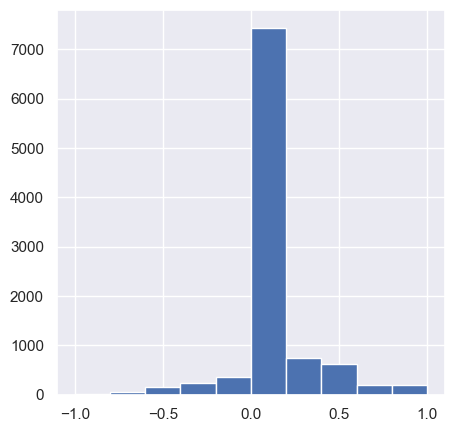

In [65]:
sns.set(rc={'figure.figsize':(5,5)})
tweets_netflix['polarity'].hist()
plt.show()

In [66]:
# Segrating based on different sentiments
tweets_netflix_negative = tweets_netflix[tweets_netflix["sentiment"]=='Negative']
tweets_netflix_positive = tweets_netflix[tweets_netflix["sentiment"]=='Positive']
tweets_netflix_neutral = tweets_netflix[tweets_netflix["sentiment"]=='Neutral']

In [67]:
# Distribution of different classes in sentiment
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])
count_values_in_column(tweets_netflix,"sentiment")

,Total,Percentage
Neutral,6607,66.06
Positive,2567,25.67
Negative,827,8.27


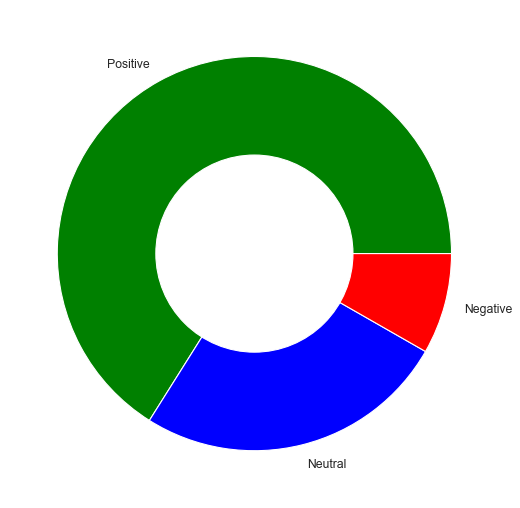

In [68]:
# create data for Pie Chart
plt.figure(figsize=(13, 8), dpi=80)
pichart = count_values_in_column(tweets_netflix,"sentiment")
names= ["Positive","Neutral","Negative"]
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


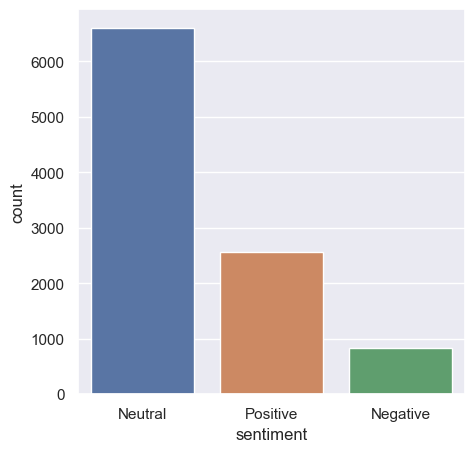

In [69]:
sns.countplot(data=tweets_netflix, x="sentiment")
plt.show()

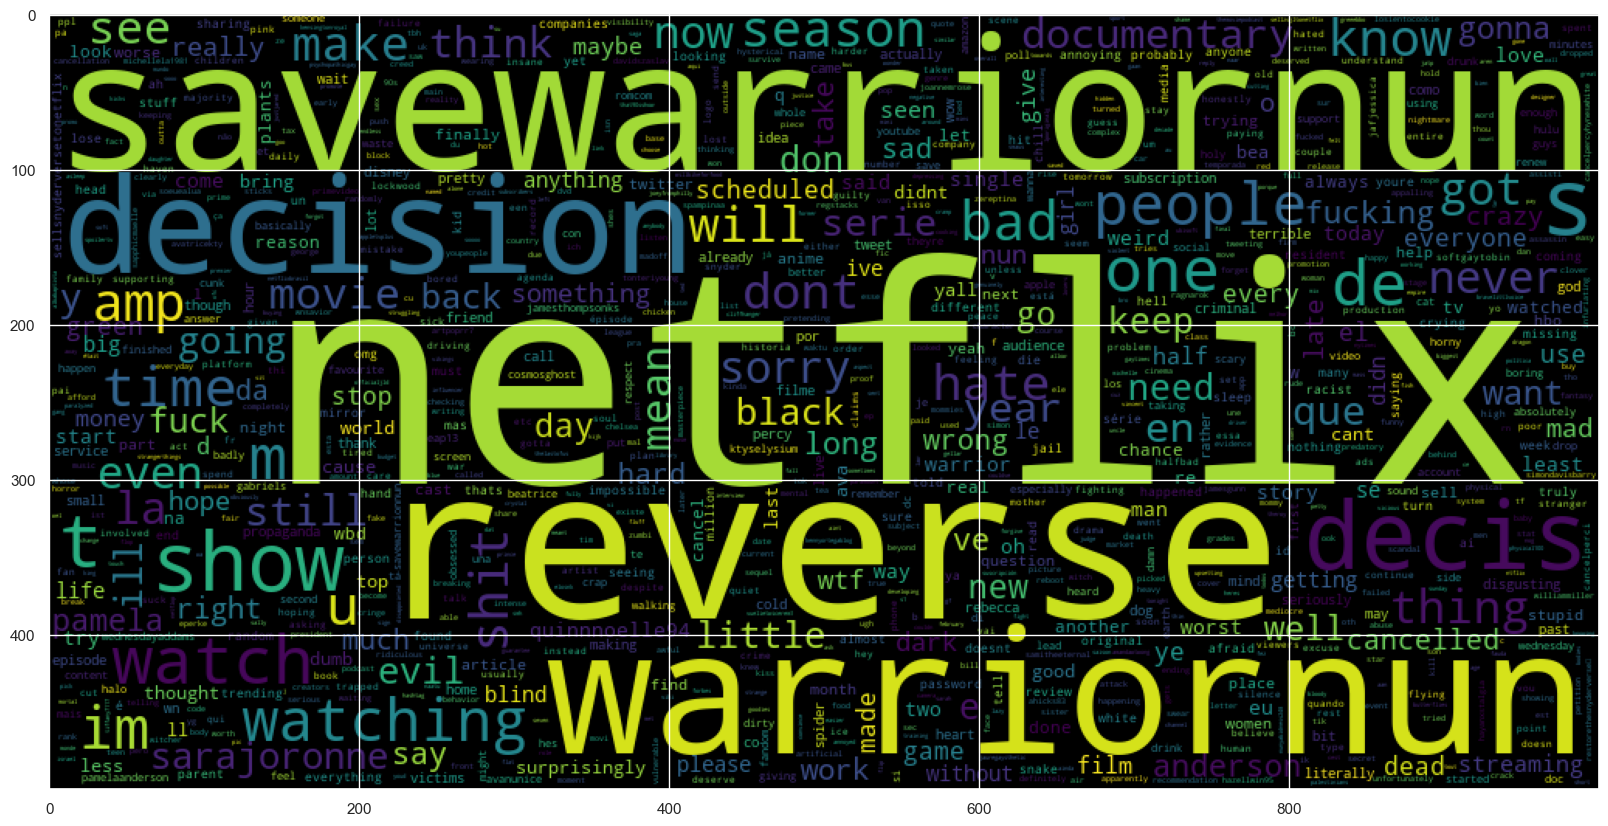

In [70]:
data_neg = tweets_netflix_negative['preprocess_Tweet']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1000 , height = 500,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.show()

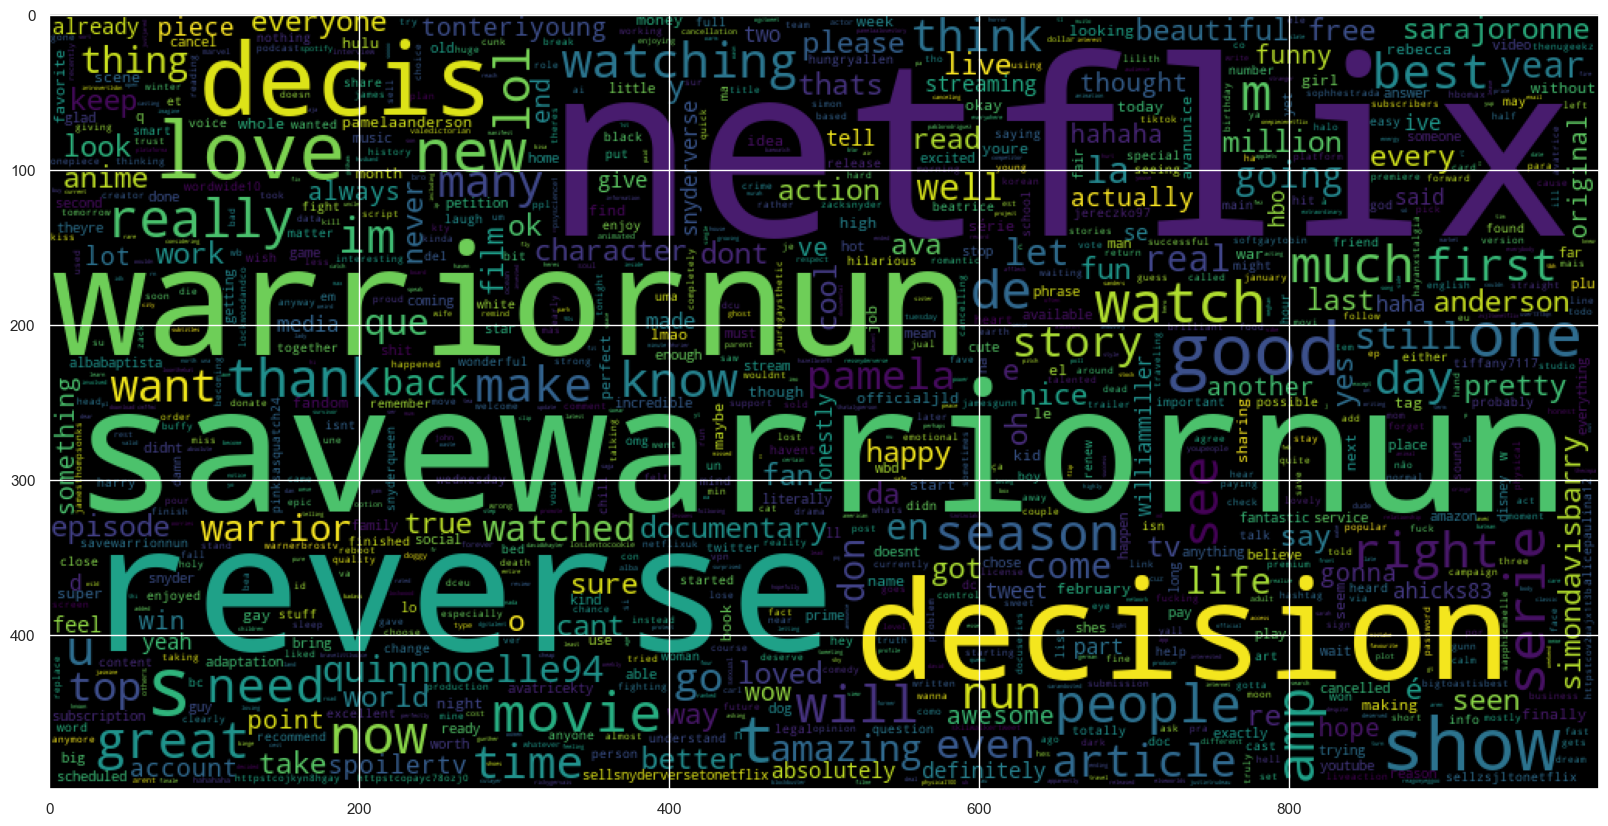

In [71]:
data_pos = tweets_netflix_positive['preprocess_Tweet']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1000 , height = 500,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)
plt.show()

In [72]:
def getSubjectivity(Tweet):
    return TextBlob(Tweet).sentiment.subjectivity

In [73]:
tweets_netflix['subjectivity']=tweets_netflix['preprocess_Tweet'].apply(getSubjectivity)
tweets_netflix.head()

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,preprocess_Tweet,polarity,sentiment,subjectivity
0,0,Mappy_HTRM,2023-01-31 23:59:59+00:00,1,Twitter for iPhone,NETFLIX REVERSE YOUR DECISION\n#SaveWarriorNun...,netflix reverse your decision\nsavewarriornun ...,0.0,Neutral,0.0
1,1,lyricstitches,2023-01-31 23:59:58+00:00,0,Twitter for iPhone,@alitheloaf Muting Netflix when u load it up s...,alitheloaf muting netflix when u load it up so...,0.1,Positive,0.8
2,2,evangfs,2023-01-31 23:59:58+00:00,0,Twitter for iPhone,Agora que eu troquei de tv eu perdi todas as s...,agora que eu troquei de tv eu perdi todas as s...,0.0,Neutral,0.0
3,3,julesr502,2023-01-31 23:59:54+00:00,0,Twitter for iPhone,@OfficialJLD @netflix You are one of my faves ...,officialjld netflix you are one of my faves as...,0.0,Neutral,0.0
4,4,goxfishxgo,2023-01-31 23:59:54+00:00,1,Twitter for iPhone,"@QuinnNoelle94 A year traveling for free, assu...",quinnnoelle94 a year traveling for free assumi...,0.4,Positive,0.8


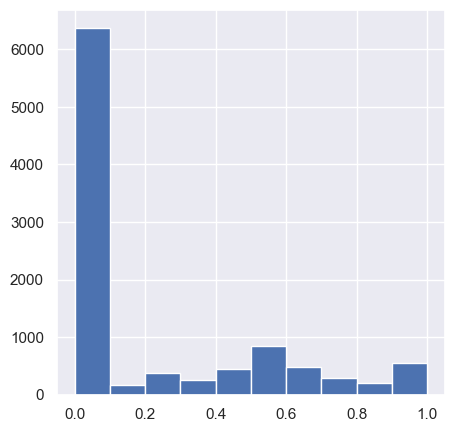

In [74]:
sns.set(rc={'figure.figsize':(5,5)})
tweets_netflix['subjectivity'].hist()
plt.show()

In [81]:
tweets_netflix.to_excel('NetflixTweets_SentimentAnalysis.xlsx',index=False)

In [82]:
# Reading Data
tweets_netflix = pd.read_excel('NetflixTweets_SentimentAnalysis.xlsx')
print(tweets_netflix.shape)

(10001, 10)


In [83]:
tweets_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        10001 non-null  int64  
 1   User              10001 non-null  object 
 2   Date Created      10001 non-null  object 
 3   Number of Likes   10001 non-null  int64  
 4   Source of Tweet   10001 non-null  object 
 5   Tweet             10001 non-null  object 
 6   preprocess_Tweet  10001 non-null  object 
 7   polarity          10001 non-null  float64
 8   sentiment         10001 non-null  object 
 9   subjectivity      10001 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 781.5+ KB


In [84]:
tweets_netflix.sample(5)

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,preprocess_Tweet,polarity,sentiment,subjectivity
2083,2083,90kid2382,2023-01-31 23:25:12+00:00,0,Twitter Web App,@SnyderQueen_ @netflix @ZSJLtoNetflix @TheNuGe...,snyderqueen netflix zsjltonetflix thenugeekz s...,0.0,Neutral,0.00
5220,5220,lesbos25,2023-01-31 22:37:56+00:00,1,Twitter for iPhone,@PsyScience1 Just one\n\nNUNS STREAM NETFLIX I...,psyscience1 just one\n\nnuns stream netflix in...,0.0,Neutral,0.00
8694,8694,m_cingrosova,2023-01-31 21:49:03+00:00,1,Twitter for iPhone,@NUNFLIXofficial Well that was nice and smooth...,nunflixofficial well that was nice and smooth ...,0.5,Positive,0.75
2894,2894,tempest1944,2023-01-31 23:12:04+00:00,7,Twitter for Android,Just sayin'...\n\n#SaveWarriorNun #WarriorNun ...,just sayin\n\nsavewarriornun warriornun \nnetf...,0.0,Neutral,0.00
8697,8697,ee_meek,2023-01-31 21:49:01+00:00,0,Twitter Web App,@jauregaysthetic so much spam\n\n#WarriorNun #...,jauregaysthetic so much spam\n\nwarriornun sav...,0.2,Positive,0.20
